In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
housing = pd.read_csv("AmesHousing.txt", sep='\t')

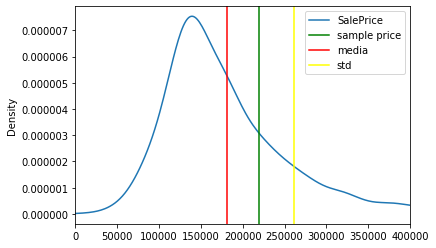

In [8]:
#How far a sample is from the media
housing.SalePrice.plot.kde()
mea = housing.SalePrice.mean()
plt.xlim(0,400000)
plt.axvline(220000,color = "green", label ="sample price")
plt.axvline(mea, color ="red", label ="media")
plt.axvline(mea + housing.SalePrice.std(ddof = 0), color ="yellow", label ="std")
plt.legend()
plt.show()

In [12]:
# How far is 220000 from the mean
sd = housing.SalePrice.std(ddof = 0)
(220000-mea)/sd

0.4908280788718362

The sample is 0.49 away from standard deviations

## THE Z-SCORE
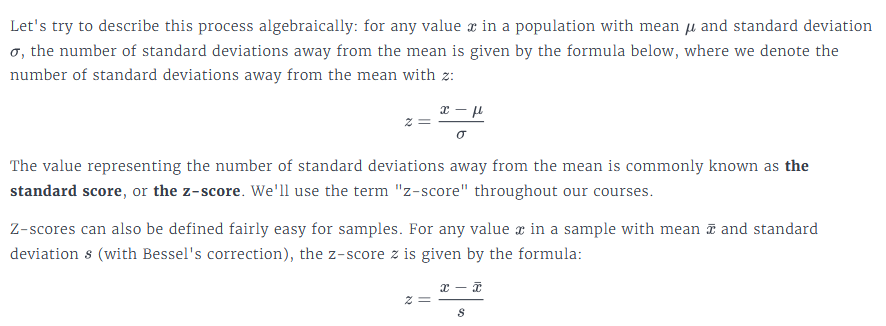

    The standard deviation of a sample should be calculated including the Bessel's correction (N-1) otherwise the z-score standard deviation will not be 1. The z-score of a sample should be calculated as well with the standard deviation with Bessel's correction

In [13]:
def zscore(value,array):
    mea = array.mean()
    std = array.std()
    z = (value - mea)/std
    return z

In [14]:
zscore(220000,housing.SalePrice)

0.4907443126661111

Task: Find the z-score for the five neighborhoods below, Sale price is 220000

    North Ames: NAmes
    College Creek: CollgCr 
    Old Town: OldTown
    Edwards: Edwards
    Somerset: Somerst


In [26]:
neigh = housing.Neighborhood.value_counts()[0:5].index

In [29]:
dic = {}
for e in neigh:
    zs = zscore(220000, housing[housing.Neighborhood == e].SalePrice)
    dic[e] = zs

In [30]:
dic

{'CollgCr': 0.33580530768877703,
 'Edwards': 1.856253730776896,
 'NAmes': 2.349319007799077,
 'OldTown': 2.1659007501504957,
 'Somerst': -0.16900704816803255}

Task: Converting all values of a ditribution to z-scores

In [39]:
mea = housing.SalePrice.mean()
sd = housing.SalePrice.std()
housing["Salezscore"] = housing.SalePrice.apply(lambda x: (x-mea)/sd)

[]

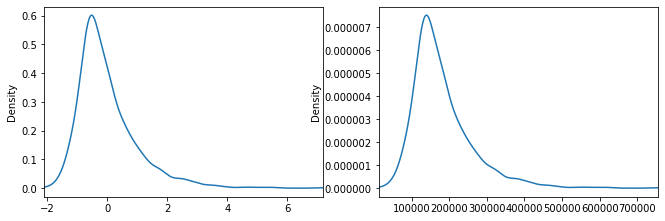

In [41]:
plt.figure(figsize = (11,3.5))
plt.subplot(1,2,1)
housing.Salezscore.plot.kde()
plt.xlim(housing.Salezscore.min(),housing.Salezscore.max())
plt.subplot(1,2,2)
housing.SalePrice.plot.kde()
plt.xlim(housing.SalePrice.min(),housing.SalePrice.max())
plt.plot()

## STANDARIZING
Standardizing distributions can prove very useful when we need to compare values coming from different systems of measurement.
### The mean and sd of z-scores are cero and one respetevely for any distribution
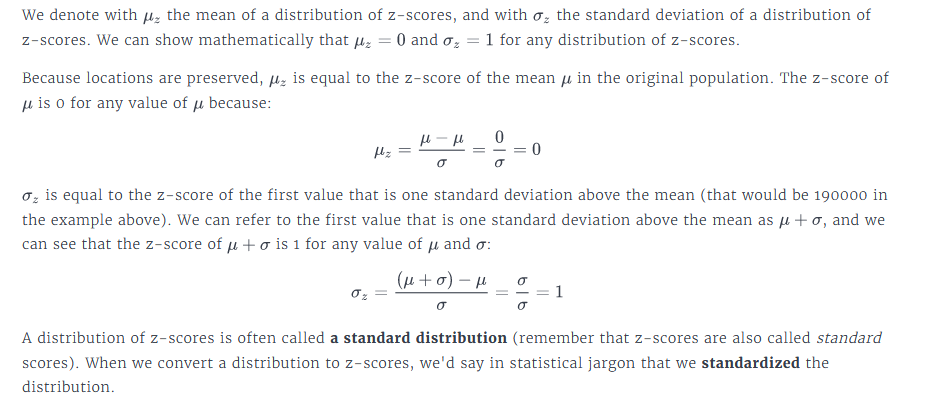

In [43]:
z_mean_price =housing.Salezscore.mean()
z_sd_price = housing.Salezscore.std()

In [44]:
meal = housing["Lot Area"].mean()
sdl = housing["Lot Area"].std()
housing["Lot_z"] = housing["Lot Area"].apply(lambda x: (x-meal)/sdl)

In [45]:
z_mean_lot = housing.Lot_z.mean()
z_sd_lot = housing.Lot_z.std()

In [46]:
z_mean_lot

1.005216009028144e-16

In [47]:
z_mean_price

-1.7801459964808823e-16

In [48]:
z_sd_lot

0.9999999999999996

In [49]:
z_sd_price

1.0000000000000024

Task: Standarize the population column

### Going backwards. From z score to transform x values to be meaningfull
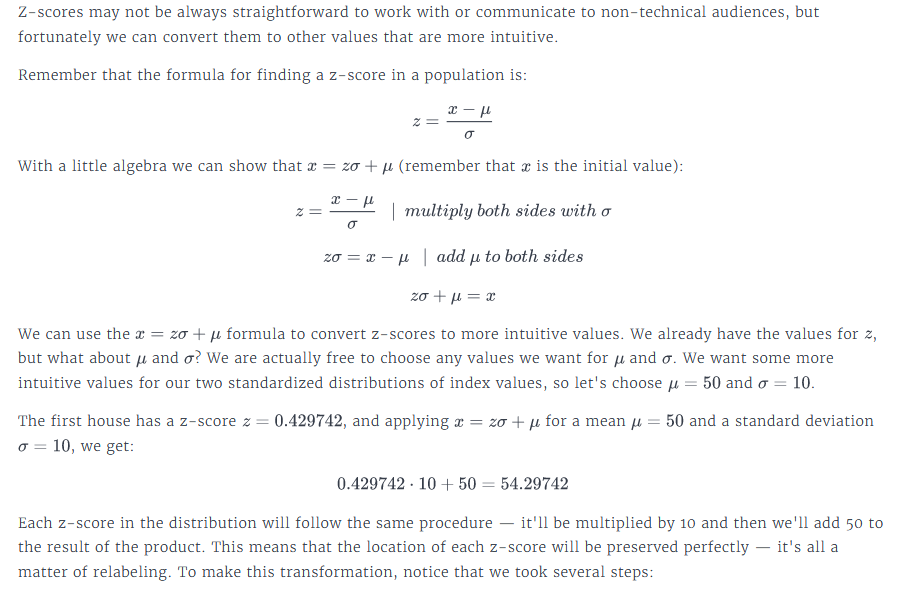

In [60]:
# Transform the z score to values
z_merged = [0.429742,0.935920,-0.114456,0.786063]
sigma =10
mean = 50
zlist = []
for e in z_merged:
    zlist.append(e*sigma + mean)

In [61]:
zlist

[54.29742, 59.3592, 48.85544, 57.86063]